# Lab 1
## Group: Mayank Shouche, Daniel Li, Sunny Kharel

# Programming Questions

### Question 1

Create 1000 samples from a Gaussian distribution with mean -10 and standard deviation 5.
Create another 1000 samples from another independent Gaussian with mean 10 and standard
deviation 5.

a) Take the sum of these 2 Gaussians by adding the two sets of 1000 points, point by point,
and plot the histogram of the resulting 1000 points. What do you observe?

b) Estimate the mean and the variance of the sum.

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# Q1a
mu_0, sigma_0 = -10, 5
x_0 = np.random.normal(mu_0, sigma_0, 1000)

mu_1, sigma_1 = 10, 5
x_1 = np.random.normal(mu_1, sigma_1, 1000)

x_add = np.add(x_0, x_1)

In [3]:
# Q1b

# Mean of the sum
add = 0
for i in x_add:
    add += i
x_mean = add/len(x_add)

# Var of the sum
add = 0
for i in x_add:
    add += (i-x_mean)**2
x_var = add/len(x_add)

Mean of the sum:  0.37901723481787225 
 Variance of the sum:  52.99105291659517


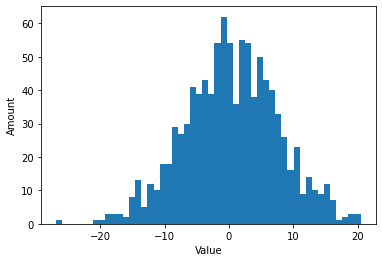

In [4]:
print("Mean of the sum: ", x_mean, "\n Variance of the sum: ", x_var)
plt.hist(x_add, bins = 20)
plt.xlabel('Value')
plt.ylabel('Amount')
plt.show()

### Question 2

Let Xi be an iid Bernoulli random variable with value {-1,1}. Look at the random variable $Z_n = \frac{1}{\sqrt n} \sum_{}^{}X_i$. By taking 1000 draws from Zn, plot its histogram. Check that for small n (say, 5-10) Zn does not look that much like a Gaussian, but when n is bigger (already by the time n = 30 or 50) it looks much more like a Gaussian.Check also for much bigger n: n = 250, to see that at this point, one can really see the bell curve.

In [5]:
# Q2
from scipy import stats
import math

In [11]:
def getZnArray(n):
    # n is the number of bernoulli variables we make
    ZnArray = []
    for j in range(1000):
        add = 0
        bernRVs = stats.bernoulli.rvs(.5, size = n)
        for i in bernRVs:
            if i != 1:
                i = -1
            add += i
        Zn = add/math.sqrt(n)
        ZnArray.append(Zn)
    return ZnArray

In [18]:
def ZnPlot(array):
    plt.hist(array, bins = 20)
    plt.xlabel('Zn Value')
    plt.xlabel('Amount')
    plt.show()

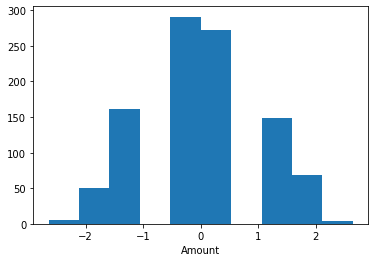

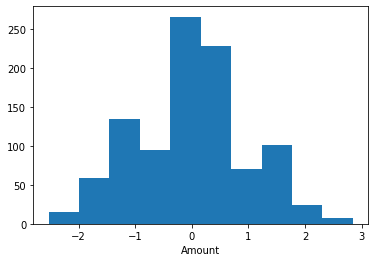

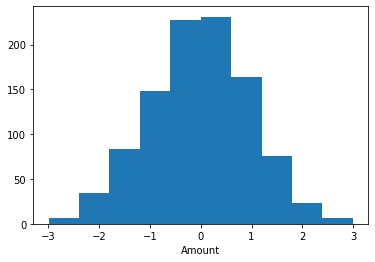

In [19]:
# Q2a - small amount (7)
sm = getZnArray(7)
ZnPlot(sm)

# Q2b - medium amount (40)
med = getZnArray(40)
ZnPlot(med)

# Q2c - large amount (1300)
lg = getZnArray(1300)
ZnPlot(lg)

Note: In the problem statement it says to see how as n grows larger (number of iid bernoulli variables) Zn should look more and more like a gaussian, however the two smaller n values actually seem to have greater similarity to a gaussian than the large n value when plotted with more bins than default (50). In fact as we increase bin amount from defualt (10) the above point happens with greater disparity i.e. 50 bins is worse than 20 is worse than 10.

### Question 3

Estimate the mean and standard deviation from 1 dimensional data:  generate 25,000 samplesfrom a Gaussian distribution with mean 0 and standard deviation 5.  Then estimate the meanand standard deviation of this gaussian using elementary numpy commands,  i.e.,  addition,multiplication,  division  (do  not  use  a  command  that  takes  data  and  returns  the  mean  orstandard deviation).


In [2]:
import numpy as np

mean = 0.0
std = 5.0
num_samples = 25000

s = np.random.normal(mean, std, num_samples)

est_mean = np.sum(s)/s.size
est_std = np.sqrt(np.sum((s-est_mean)**2)/s.size) #STD formula: sqrt(sum((x-mean)^2)/N)

print('Estimated Mean: {} \nEstimated Std. Deviation: {}'.format(est_mean, est_std))



Estimated Mean: -0.027697411320167765 
Estimated Std. Deviation: 4.980134938033478


### Question 4

Estimate the mean and covariance matrix for multi-dimensional data: generate 10,000 samplesof 2 dimensional data from the Gaussian distribution

![title](CodeCogsEqn.png)

Then, estimate the mean and covariance matrix for this multi-dimensional data using elemen-tary numpy commands, i.e., addition, multiplication, division (do not use a command thattakes data and returns the mean or standard deviation).

In [3]:
mean = [-5, 5]
cov = [[20, .8], [.8, 30]]
num_samples = 10000
s = np.random.multivariate_normal(mean,cov,num_samples)

est_mean = [np.sum(s[:,0])/s[:,0].size, np.sum(s[:,1])/s[:,1].size]


#formula for covariance (1/(n-1))*s_cent.T*s_cent
s_cent = np.vstack([(s[:,0]-est_mean[0]), (s[:,1]-est_mean[1])]).T
est_cov = (1/(num_samples-1))*s_cent.T.__matmul__(s_cent)



print('Estimated mean: {}'.format(mean))
print('Estimated Std Deviation: \n{}'.format(est_cov))

Estimated mean: [-5, 5]
Estimated Std Deviation: 
[[20.3849531   0.8581511 ]
 [ 0.8581511  29.36204194]]


### Question 5

Download from Canvas/Files the dataset PatientData.csv. Each row is a patient and the last column is the condition that the patient has. Do data exploration using Pandas and other visualization tools to understand what you can about the dataset. 

In [1]:
import numpy as np
import pandas as pd

patient_data = pd.read_csv('PatientData.csv', header=None)

In [2]:
patient_data

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1


### (a)  How many patients and how many features are there?

In [3]:
num_patients, num_features = patient_data.shape
print('# Patients:', num_patients)
print('# Features:', num_features)

# Patients: 452
# Features: 280


### (b)  What is the meaning of the first 4 features?  See if you can understand what they mean.

Median for feature 0 47.0
Median for feature 1 1.0
Median for feature 2 164.0
Median for feature 3 68.0


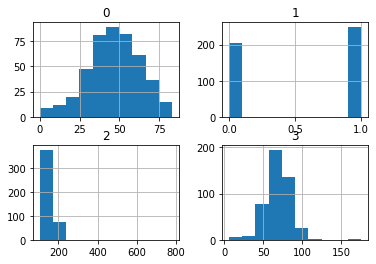

In [4]:
patient_data.hist(column=[0, 1, 2, 3])
for idx in [0, 1, 2, 3]:
    print("Median for feature", idx, patient_data[idx].median())

**Feature 0** seems to be normally distributed and seems to be age, as there are no distinct outliers.

**Feature 1** appears to be categorical; it could match gender as there are two distinct values.

**Feature 2** could be height in centimeters. The USA average is ~ 175 cm for adult males and ~ 162 cm for adult females (see [here](https://en.wikipedia.org/wiki/Average_human_height_by_country)), so the probable inclusion of children in this dataset seems to correlate with an average 164 cm height.

**Feature 3** looks like heart rate, as it is normal and has a median of 68.0, in the range of a normal adult's base heart rate (60 - 100, see [here](https://www.mayoclinic.org/healthy-lifestyle/fitness/expert-answers/heart-rate/faq-20057979#:~:text=A%20normal%20resting%20heart%20rate%20for%20adults%20ranges%20from%2060,function%20and%20better%20cardiovascular%20fitness)).

### (c)  Are there missing values?  Replace them with the average of the corresponding feature column

In [5]:
# missing values in the dataset show up as '?'
# coerce them to NaNs first to get columns that need to be fixed
for col_name, col_data in patient_data.iteritems():
    patient_data[col_name] = pd.to_numeric(col_data, errors='coerce')

print("NaNs before:", patient_data.isna().sum().sum())
patient_data.fillna(patient_data.median(), inplace=True)
print("NaNs after:", patient_data.isna().sum().sum())

NaNs before: 408
NaNs after: 0


### (d)  How could you test which features strongly influence the patient condition and which do not?

In [6]:
# let's use correlation between each feature and the condition (last column)
corr = patient_data.corr()[num_features-1][:-1].dropna()

# sort by magnitude of correlation to target column 
corr.sort_values(ascending=False, key=abs)

90     0.368876
4      0.323879
92     0.313982
102    0.282523
223    0.235488
         ...   
116   -0.000711
38    -0.000666
218   -0.000552
124    0.000208
110   -0.000169
Name: 279, Length: 262, dtype: float64

### List what you think are the three most important features.

The three most important are features **90**, **4**, and **92** (indexed 0-based). They have the highest correlation with the condition.

# Hand Written Questions

### Q1

![title](lab1_q1.png)


### Q2.

![title](lab1_q2.png)

### Q3. 
Consider a coin such that probability of heads is 2/3. Suppose you toss the coin 100 times. Estimate the probability of getting 50 or fewer heads. You can do this in a variety of ways. One way is to use the Central Limit Theorem. Be explicit in your calculations and tell us what tools you are using in these.

Lets first start with a smaller case to work with, flipping 10 coins. Chance of getting 0 heads is $(\frac 2 3)^0 * (\frac 1 3)^{10}$ since getting 0 heads means getting 10 tails. Now let's look at the case of getting 9 tails (1 head). Similar to the case of 0 head we start with $(\frac 2 3)^1 * (\frac 1 3)^{9}$ which tells us one case for getting exactly 1 head and 9 tails. However, since any of the coins can be heads we have 10 cases where one coin gets head or also $10\choose1$. Note for 0 heads this would be $10\choose0$ or 1. In fact calculating getting an exact amount of heads is merely an RV with a binomial distribution - ${n\choose k}*p^k*(1-p)^{n-k}$. Now that we can calculate getting an exact amount of heads, summing them would get us the probabilty of getting x1 heads to x2 heads (CDF of the binomial RV). Since the problem asks for 50 or fewer heads, our x1 is 0 and x2 is 50. So the probability is ${P = \sum_{k=0}^{50}}{100\choose k}*(\frac 2 3)^k*(\frac 1 3)^{n-k}$.